<a href="https://colab.research.google.com/github/the-aryan-1712/DeepFlow-Stamatics/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment Instructions
- Load the Zomato dataset using Pandas.
- Inspect the dataset and understand its structure.


- Handle missing values appropriately.


- Remove duplicate entries.


- Correct inconsistent data formats (e.g., cuisines, currency, location).


- Standardise key columns like ratings, price, and location.


- Convert columns to appropriate data types (e.g., float, int, datetime).


- Save the cleaned and structured dataset for analysis.


- Group data by cuisine and calculate average ratings, votes, and price range.


- Identify top cuisines based on ratings and popularity (votes).


- Highlight best-rated restaurants and link them to their cuisine types.


- Analyse and generate insights into user preferences by cuisine.


- Visualise key findings using Matplotlib.


In [ ]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [ ]:
df = pd.read_excel("data.xlsx")

In [ ]:
df.shape

(41263, 11)

### Check for missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41263 non-null  object 
 1   online_order                 41263 non-null  object 
 2   book_table                   41263 non-null  object 
 3   Rating                       41263 non-null  float64
 4   votes                        41263 non-null  int64  
 5   location                     41263 non-null  object 
 6   rest_type                    41263 non-null  object 
 7   cuisines                     41263 non-null  object 
 8   approx_cost(for two people)  41263 non-null  int64  
 9   listed_in(type)              41263 non-null  object 
 10  listed_in(city)              41263 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.5+ MB


In [ ]:
df.describe()

,Rating,votes,approx_cost(for two people)
count,41263.000000,41263.000000,41263.000000
mean,3.702011,352.683179,603.914063
std,0.439985,884.177761,464.942973
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,277.000000,750.000000
max,4.900000,16832.000000,6000.000000


### Check for duplicates

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.shape

73


(41190, 11)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
Rating                         0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'Rating', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Correcting Incorrect data format

In [ ]:
cols = ['name', 'online_order', 'book_table', 'location',
        'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']

for c in cols:
    df[c] = df[c].map(lambda x: str(x).strip().title())


In [ ]:
df.loc[:, 'cuisines'] = df['cuisines'].astype(str).apply(
    lambda x: ', '.join([c.strip().title() for c in x.split(',')])
)

In [ ]:
df['cuisines']

0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
41258                      North Indian, Continental
41259    Andhra, South Indian, Chinese, North Indian
41260                                    Continental
41261                                    Finger Food
41262         Finger Food, North Indian, Continental
Name: cuisines, Length: 41190, dtype: object

### Standardize Columns like Ratings, Price, Location

In [ ]:
print(df['Rating'].min())
print(df['Rating'].max())

1.8
4.9


In [ ]:

print(df['approx_cost(for two people)'].min())
print(df['approx_cost(for two people)'].max())

40
6000


In [ ]:
print("Missing values:", df['Rating'].isna().sum())
print("Missing values:", df['approx_cost(for two people)'].isna().sum())

Missing values: 0
Missing values: 0


### Clean approx_cost by converting string with commas to int

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())


### Converting Columns to Correct Data Types

In [ ]:
df['votes'] = df['votes'].astype(int)
df['Rating'] = df['Rating'].astype(float)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [ ]:
df.to_csv("zomato_cleaned_data.csv", index=False)

### Grouping by Cuisine and Calculating Averages

In [ ]:
df['primary_cuisine'] = df['cuisines'].apply(lambda x: x.split(',')[0].strip())

grouped = df.groupby('primary_cuisine').agg({
    'Rating': 'mean',
    'votes': 'mean',
    'approx_cost(for two people)': ['mean', 'min', 'max']
}).sort_values(('Rating', 'mean'), ascending=False)

print(grouped.head(10))

                   Rating        votes approx_cost(for two people)            
                     mean         mean                        mean   min   max
primary_cuisine                                                               
African          4.592308   478.923077                 1000.000000  1000  1000
Malaysian        4.425000  1748.187500                 1200.000000  1000  1800
Parsi            4.406667  3686.600000                 1300.000000  1300  1300
Middle Eastern   4.400000  1436.200000                  300.000000   300   300
Sushi            4.400000   219.333333                 2000.000000  2000  2000
Modern Indian    4.314019  1087.130841                 1572.897196   250  2500
Singaporean      4.300000   385.000000                 1500.000000  1500  1500
German           4.300000  2320.500000                 1800.000000  1800  1800
European         4.261842  1640.907895                 1792.543860  1300  3000
Portuguese       4.227273   891.909091              

### Identifing Top Cuisines by Rating & Popularity

In [ ]:
top_cuisines = grouped.sort_values(('Rating', 'mean'), ascending=False).head(10)
print(top_cuisines)

                   Rating        votes approx_cost(for two people)            
                     mean         mean                        mean   min   max
primary_cuisine                                                               
African          4.592308   478.923077                 1000.000000  1000  1000
Malaysian        4.425000  1748.187500                 1200.000000  1000  1800
Parsi            4.406667  3686.600000                 1300.000000  1300  1300
Middle Eastern   4.400000  1436.200000                  300.000000   300   300
Sushi            4.400000   219.333333                 2000.000000  2000  2000
Modern Indian    4.314019  1087.130841                 1572.897196   250  2500
Singaporean      4.300000   385.000000                 1500.000000  1500  1500
German           4.300000  2320.500000                 1800.000000  1800  1800
European         4.261842  1640.907895                 1792.543860  1300  3000
Portuguese       4.227273   891.909091              

### Best-Rated Restaurants by Cuisine

In [ ]:
best_rated = df[df['Rating'] >= 4.5].sort_values(by='Rating', ascending=False)
print(best_rated[['name', 'cuisines', 'Rating', 'votes']].head(10))


                                 name  \
30545          Belgian Waffle Factory   
3825      Byg Brewski Brewing Company   
22446  Asia Kitchen By Mainland China   
40027     Byg Brewski Brewing Company   
23154  Asia Kitchen By Mainland China   
31927                    Punjab Grill   
11649          Belgian Waffle Factory   
14124          Belgian Waffle Factory   
31482                    Punjab Grill   
39351     Byg Brewski Brewing Company   

                                                cuisines  Rating  votes  
30545                                           Desserts     4.9   1749  
3825   Continental, North Indian, Italian, South Indi...     4.9  16345  
22446                        Asian, Chinese, Thai, Momos     4.9   2227  
40027  Continental, North Indian, Italian, South Indi...     4.9  16832  
23154                        Asian, Chinese, Thai, Momos     4.9   2235  
31927                              North Indian, Mughlai     4.9   1940  
11649                         

### Analyzing Preferences by Cuisine

In [ ]:
all_cuisines = df['cuisines'].str.split(',').sum()
common_cuisines = pd.Series(Counter([c.strip() for c in all_cuisines])).sort_values(ascending=False)

print(common_cuisines.head(10))

North Indian    17180
Chinese         12834
South Indian     6351
Fast Food        6314
Continental      5180
Biryani          5008
Cafe             4781
Desserts         4501
Beverages        3828
Italian          3167
dtype: int64


### Visualizing with Matplotlib

### Top cuisines by count

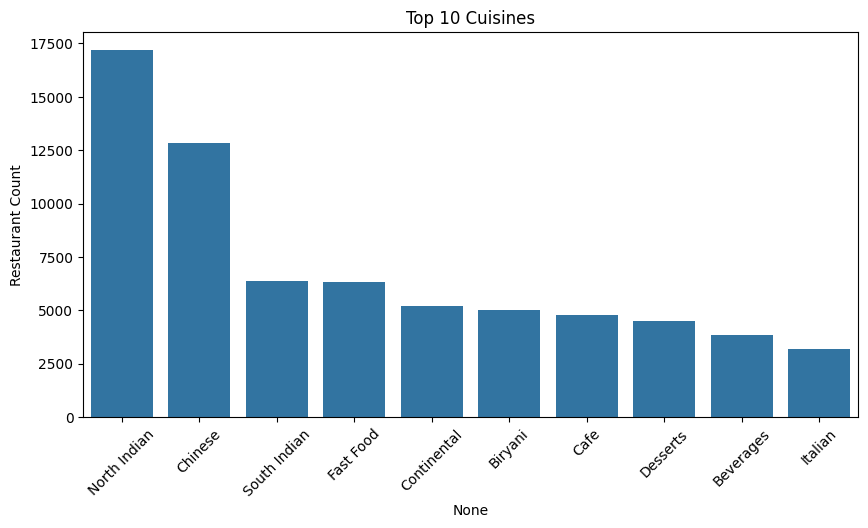

In [ ]:
# Break cuisines into list and flatten
cuis_list = sum(df['cuisines'].dropna().apply(lambda x: [i.strip() for i in x.split(',')]), [])

# Count top 10 cuisines
top_cuis = pd.Series(Counter(cuis_list)).nlargest(10)

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=top_cuis.index, y=top_cuis.values)
plt.title('Top 10 Cuisines')
plt.ylabel('Restaurant Count')
plt.xticks(rotation=45)
plt.show()

### Top cuisines by average rating

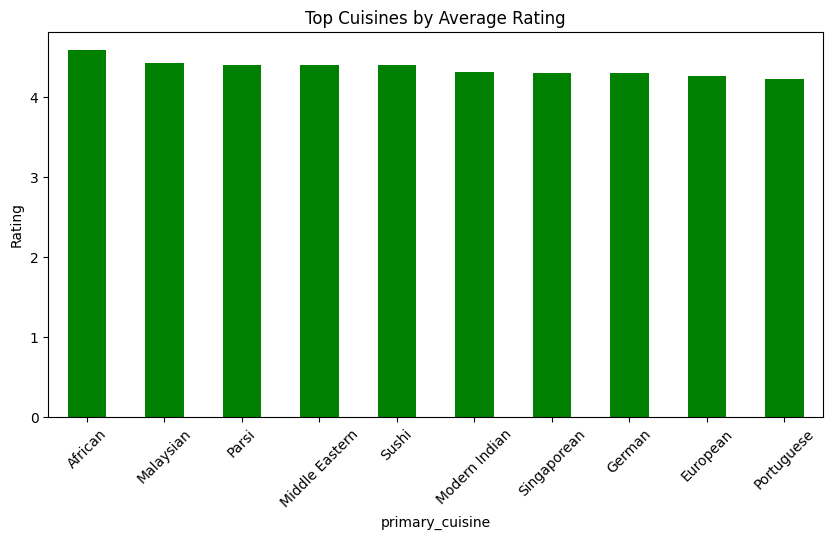

In [ ]:

top_cuisines['Rating']['mean'].plot(kind='bar', figsize=(10,5), color='green')
plt.title('Top Cuisines by Average Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

### Distribution of Ratings

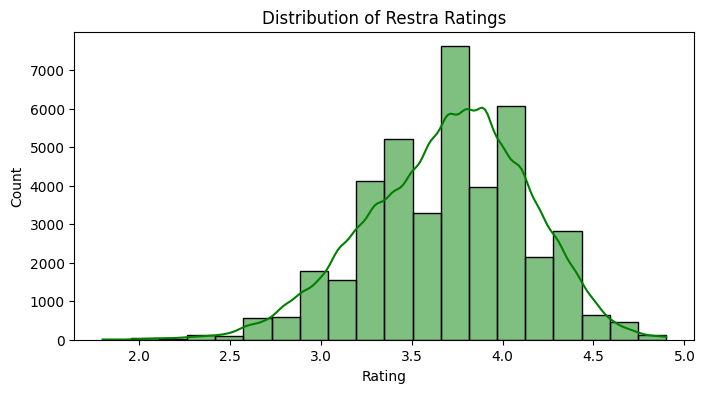

In [ ]:

plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Restra Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Distribution of Cost for Two People

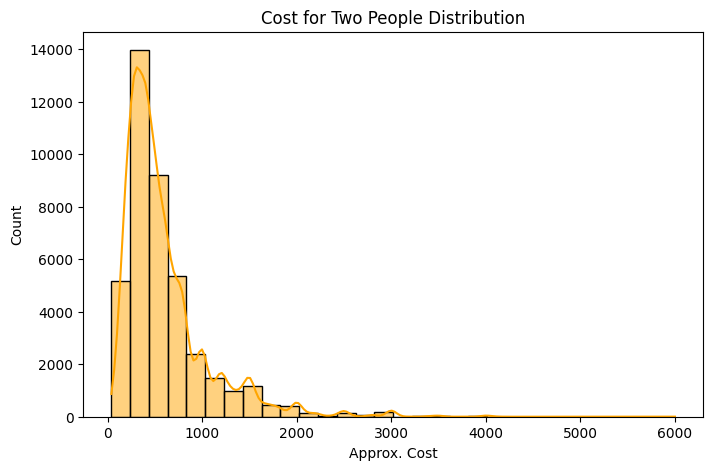

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['approx_cost(for two people)'], bins=30, kde=True, color='orange')
plt.title('Cost for Two People Distribution')
plt.xlabel('Approx. Cost')
plt.ylabel('Count')
plt.show()

### Top 10 Locations with Most Restaurants

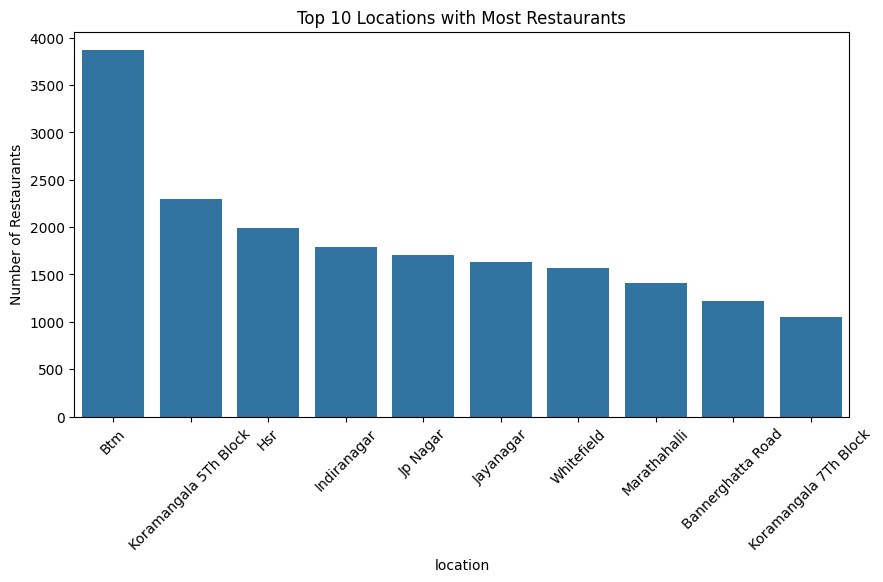

In [ ]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Locations with Most Restaurants')
plt.xticks(rotation=45)
plt.ylabel('Number of Restaurants')
plt.show()

### Ratings vs Cost Scatterplot

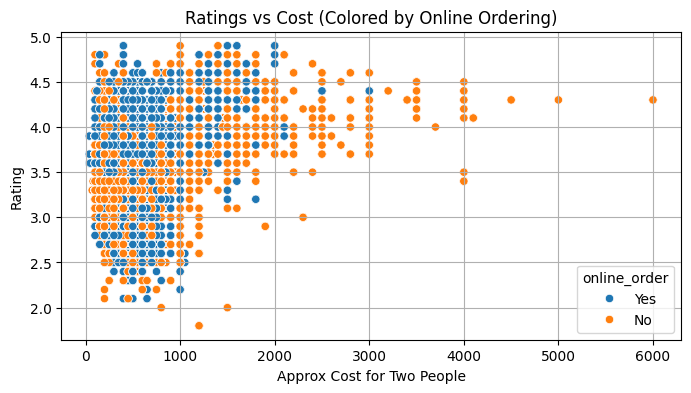

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='Rating', hue='online_order')
plt.title('Ratings vs Cost (Colored by Online Ordering)')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Rating')
plt.grid(True)
plt.show()